In [1]:
"""
    case study reference : without dropout vs with dropout
    save "pre_autoencoder.pth" into target dir
    load pre_autoencoder.pth add boundary sample into train
"""

'\n    case study reference : without dropout vs with dropout\n    save "pre_autoencoder.pth" into target dir\n    load pre_autoencoder.pth add boundary sample into train\n'

In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

TAR_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0"
REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"

ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis2'

DEVICE='cpu'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)
tar_datainit = DataInit(TAR_PATH,TAR_PATH,TAR_EPOCH,DEVICE)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVis_Visualizer.visualizer import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 5864.45it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 5767.33it/s]


absolute alignment indicates number: 106 label diff indicates number: 12 confidence diff indicates number: 16 high distance number: 97


In [23]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)
import os
if os.path.exists(os.path.join(TAR_PATH, "pre_autoencoder.npy")):
    print("continue")
    autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder.npy"), os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=5,learning_rate=1e-2)
else:
    print("new one")
    autoencoder = AutoEncoder_Generator.encoder_trainer(os.path.join(TAR_PATH, "pre_autoencoder.npy"),batch_size=500,num_epochs=10)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8112.46it/s]

NET resnet18_with_dropout


Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7584.75it/s]


continue
NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8135.50it/s]

NET resnet18_with_dropout
Finish initialization...



100%|██████████| 3/3 [00:00<00:00, 6619.10it/s]


Epoch [1/5], Loss: 1.3138, Loss decoder: 0.0009,Loss encoder: 0.0012,flip_loss: 103.59918212890625,pred_loss:15.96215534210205,loss_contrastive104.23495768737793,cka_loss0.011913061141967773


100%|██████████| 3/3 [00:00<00:00, 5685.91it/s]


Epoch [2/5], Loss: 1.3547, Loss decoder: 0.0009,Loss encoder: 0.0012,flip_loss: 106.28453063964844,pred_loss:16.53544807434082,loss_contrastive114.90575663757325,cka_loss0.009481251239776611


100%|██████████| 3/3 [00:00<00:00, 6647.07it/s]


Epoch [3/5], Loss: 1.3868, Loss decoder: 0.0009,Loss encoder: 0.0012,flip_loss: 104.07157135009766,pred_loss:15.815783500671387,loss_contrastive176.53668309020995,cka_loss0.009390115737915039


100%|██████████| 3/3 [00:00<00:00, 4848.91it/s]


Epoch [4/5], Loss: 1.3879, Loss decoder: 0.0009,Loss encoder: 0.0012,flip_loss: 108.20872497558594,pred_loss:16.00527000427246,loss_contrastive135.4803251800537,cka_loss0.008207738399505615


100%|██████████| 3/3 [00:00<00:00, 6750.49it/s]

Epoch [5/5], Loss: 1.4013, Loss decoder: 0.0009,Loss encoder: 0.0012,flip_loss: 106.05864715576172,pred_loss:15.358704566955566,loss_contrastive177.68852177429198,cka_loss0.007396876811981201


In [24]:
indicates = []
for i in range(len(ref_scores)):
    if ref_scores[i] ==1 and tar_scores[i] < 0.9:
        indicates.append(i)
    

len(indicates)


6

Computing decision regions ...


100%|██████████| 1/1 [00:00<00:00, 5090.17it/s]


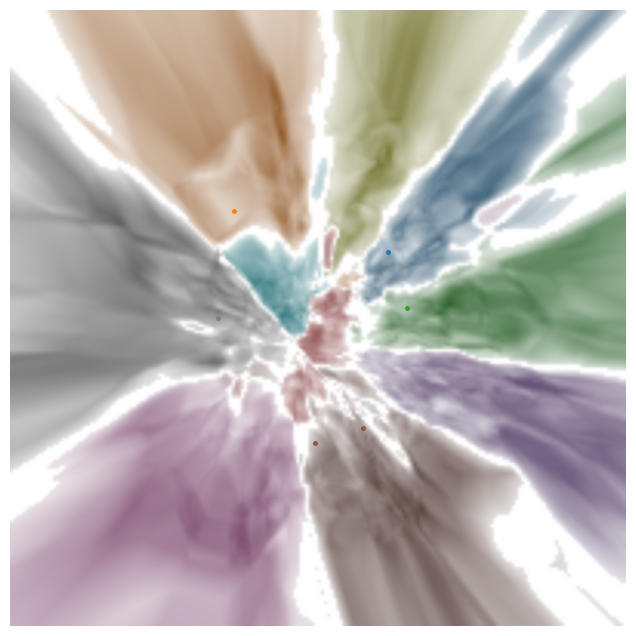

In [16]:
import json
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")

I = np.eye(512)
from AlignVis_Visualizer.visualizer_linear import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(ref_provider,I,I, np.dot(ref_train_data,I), projector, 200,[indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(200, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/alignment_evaluation/img1.png"))

Computing decision regions ...


100%|██████████| 1/1 [00:00<00:00, 3830.41it/s]


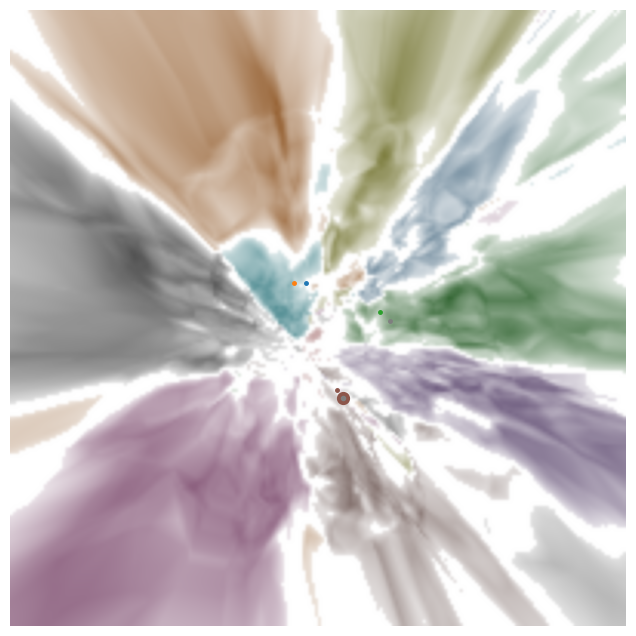

In [17]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 7820.01it/s]
../AlignVis_Visualizer/visualizer.py:191: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../AlignVis_Visualizer/visualizer.py:192: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../AlignVis_Visualizer/visualizer.py:193: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq

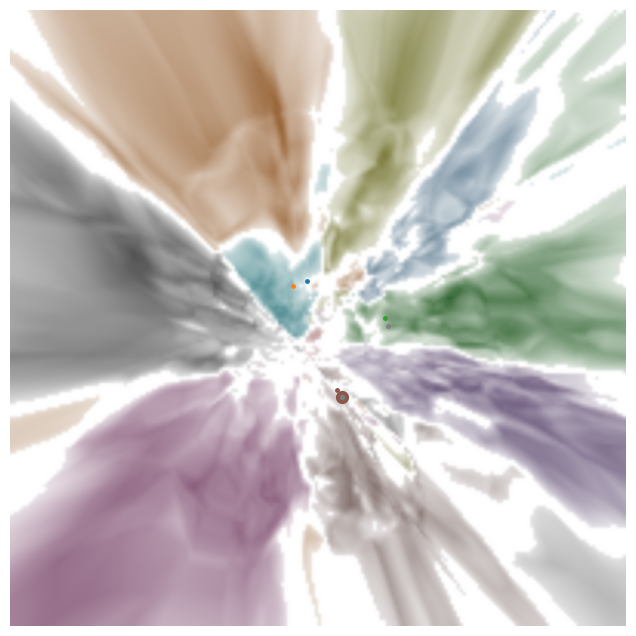

In [27]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [3]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7493.58it/s]

NET resnet18_with_dropout


Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7806.84it/s]


In [ ]:
import os
autoencoder = AutoEncoder_Generator.encoder_trainer_with_pre_trained(os.path.join(TAR_PATH, "pre_autoencoder.npy"), os.path.join(TAR_PATH, "pre_autoencoder_1_init.npy"),batch_size=500,num_epochs=10)

In [39]:
path_ = "/home/yifan/Exp/Dropout/0.8/experiment1/pre_autoencoder_add_cka.pth"
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
######### initialize autoencoder and dataloader #########################
from AlignVisAutoEncoder.autoencoder import SimpleAutoencoder
from AlignVisAutoEncoder.data_loader import DataLoaderInit
input_dim = 512
output_dim = 512
batch_size = 500

autoencoder = SimpleAutoencoder(input_dim,output_dim)
checkpoint = torch.load(path_)
autoencoder.load_state_dict(checkpoint['model_state_dict'])


<All keys matched successfully>

In [2]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator
AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8287.70it/s]

NET resnet18_with_dropout


Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8019.64it/s]


In [ ]:
autoencoder, ref_b_features, tar_b_features = AutoEncoder_Generator.encoder_trainer_with_border("/home/yifan/Exp/Dropout/0.8/experiment1/pre_with_border.pth",num_epochs=10)

In [7]:
####### save aligned refernce target aligned boundary sample
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_b_features)
np.save(location_T, tar_b_features)

In [5]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
eval.eval_boundary_nn_autoencoder(tar_b_features, autoencoder)

NameError: name 'tar_b_features' is not defined

In [ ]:
new_, ref_b, yar_b = AutoEncoder_Generator.encoder_active_learning_only_border(path_, "/home/yifan/Exp/Dropout/0.8/experiment1/456.pth",num_epochs=3)

In [5]:
import os

In [7]:
####### save aligned refernce target aligned boundary sample
import os
location_R = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_ref_border.npy")
location_T = os.path.join(TAR_PATH, "Model","Epoch_{:d}".format(TAR_EPOCH), "aligned_tar_border.npy")
np.save(location_R, ref_b)
np.save(location_T, yar_b)

In [6]:
ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
ref_border_centers = np.load(ref_border_centers_loc).squeeze()

In [7]:
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
tar_border_centers = np.load(tar_border_centers_loc).squeeze()

In [ ]:
new_2 = AutoEncoder_Generator.use_generated_boundary(path_, "/home/yifan/Exp/Dropout/0.8/experiment1/789.pth",ref_border_centers,tar_border_centers,num_epochs=5)

In [2]:
import os
pre_saved_path = os.path.join(TAR_PATH, "pre_autoencoder_add_cka.pth")
autoencoder = SimpleAutoencoder(input_dim,output_dim)
checkpoint = torch.load(pre_saved_path)
autoencoder.load_state_dict(checkpoint['model_state_dict'])

NameError: name 'TAR_PATH' is not defined

In [20]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)
# eval.eval_boundary_nn_autoencoder(tar_border_centers, autoencoder)

In [21]:
eval.eval_boundary_nn_autoencoder(ref_border_centers, autoencoder)

NameError: name 'ref_border_centers' is not defined

In [10]:
eval.eval_boundary_nn_autoencoder(tar_border_centers, new_2)

#train# boundary preserving: 0.11/15 in epoch 200


0.11496

In [ ]:
import os
pre_saved_path = os.path.join(TAR_PATH, "pre_autoencoder_add_cka.pth")
autoencoder = AutoEncoder_Generator.encoder_trainer(pre_saved_path,batch_size=200,num_epochs=20)

Computing decision regions ...


100%|██████████| 250/250 [00:00<00:00, 7431.18it/s]


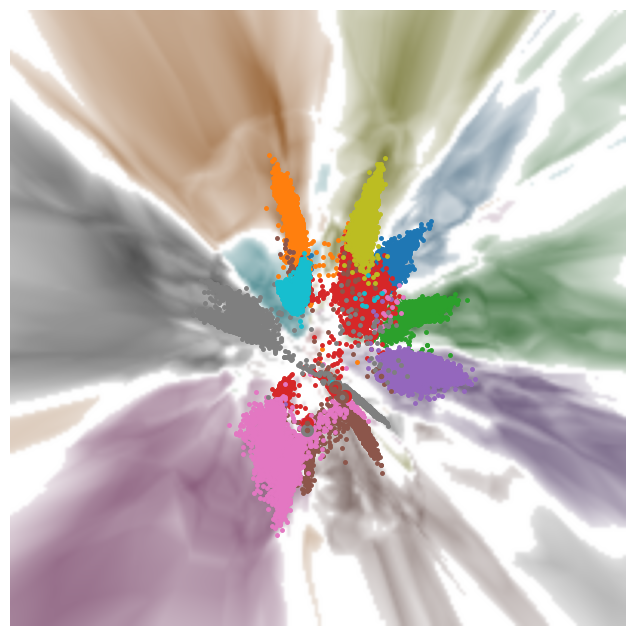

In [25]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

In [8]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = new_.encoder(Y)
I = np.eye(512)
from AlignVis_Visualizer.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, new_, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join(TAR_PATH, "vis.png"))

NameError: name 'new_' is not defined

In [7]:
eval.eval_nn_train_ref_in_ref(15)

Wed May 10 21:54:34 2023 Building RP forest with 16 trees
Wed May 10 21:54:34 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Wed May 10 21:54:36 2023 Building RP forest with 16 trees
Wed May 10 21:54:36 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving ref in ref: 1.22/15 in epoch 200


1.22486

In [7]:
eval.eval_nn_train_autoencoder(15,autoencoder)

Thu May 11 01:58:32 2023 Building RP forest with 16 trees
Thu May 11 01:58:33 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu May 11 01:58:49 2023 Building RP forest with 16 trees
Thu May 11 01:58:50 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.25/15 in epoch 200


1.255

In [18]:
from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
encoded_Y = autoencoder.encoder(torch.Tensor(tar_train_data))
encoded_Y = encoded_Y.detach().numpy()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(5000), size=1000, replace=False)
print('CKA between absolute alignmnet subset is:',np_cka.kernel_CKA(tar_train_data[indicates],encoded_Y[indicates]))

CKA between absolute alignmnet subset is: 0.9859847963141509


In [26]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 7001.34it/s]

#train# autoencoder PPR: 0.86 in epoch 200


0.85808

In [ ]:
eval_res = {
    "nn_vs_ref":"1.25/1.23",
    "ppr_vs_ref":"0.99/0.93",
    "bpr_vs_ref":"2.92,1.71",
    "pred_preserving" : "49110/49978",
    "pred_flip": "15/22",
    "short_movement": "227/228",
    "long_movement": "6490/6501"
}

In [47]:
eval.eval_ppr_ref_in_ref()

100%|██████████| 250/250 [00:00<00:00, 7978.82it/s]

#train# ref in ref PPR: 0.98 in epoch 200


0.9828

In [12]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 8086.87it/s]

#train# autoencoder PPR: 1.00 in epoch 200


0.99946

In [16]:
border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "border_centers.npy")
border_centers = np.load(border_centers_loc).squeeze()

In [ ]:
# eval.eval_boundary_nn_ref_in_ref(border_centers,autoencoder,15)

In [15]:
eval.eval_boundary_nn_autoencoder(yar_b,autoencoder,15)

#train# boundary preserving: 0.11/15 in epoch 200


0.11496

In [12]:
ref_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_ref_border.npy")
tar_border_centers_loc = os.path.join(TAR_PATH,"Model", "Epoch_{:d}".format(TAR_EPOCH),
                                          "aligned_tar_border.npy")
ref_b_features = np.load(ref_border_centers_loc).squeeze()
tar_b_features = np.load(tar_border_centers_loc).squeeze()

In [16]:
from AlignVis.AlignmentBoundaryGenerator import AlignmentBoundaryGenerator
BoundaryGen = AlignmentBoundaryGenerator(REF_PATH,TAR_PATH,REF_PATH,TAR_PATH,REF_EPOCH,TAR_EPOCH,DEVICE)
ref_b_features,tar_b_features = BoundaryGen.get_boundary_features(DEVICE,num_adv_eg=1000)

NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 7775.18it/s]

NET resnet18_with_dropout


Finish initialization...


100%|██████████| 250/250 [00:38<00:00,  6.42it/s]


data1_index or data2_index is None
data1_index or data2_index is None
conf1 (2923, 10) (227, 10) (2923, 10) (227, 10)
data1_index or data2_index is None
conf1 (2923, 10) (6, 10) (2923, 10) (6, 10)
data1_index or data2_index is None
data1_index or data2_index is None
conf1 (196, 10) (3, 10) (196, 10) (3, 10)
conf1 (227, 10) (378, 10) (227, 10) (378, 10)
data1_index or data2_index is None
conf1 (196, 10) (227, 10) (196, 10) (227, 10)
data1_index or data2_index is None
conf1 (2923, 10) (378, 10) (2923, 10) (378, 10)
conf1 (227, 10) (57, 10) (227, 10) (57, 10)
data1_index or data2_index is None
data1_index or data2_index is None
conf1 (6, 10) (196, 10) (6, 10) (196, 10)
data1_index or data2_index is None
data1_index or data2_index is None
data1_index or data2_index is None
data1_index or data2_index is None
data1_index or data2_index is None
conf1 (2923, 10) (3, 10) (2923, 10) (3, 10)
conf1 (196, 10) (378, 10) (196, 10) (378, 10)
data1_index or data2_index is None
data1_index or data2_inde

In [17]:
eval.eval_boundary_nn_autoencoder(tar_b_features,autoencoder,15)

#train# boundary preserving: 0.33/15 in epoch 200


0.33298

In [19]:
def eval_boundary_align_sensitivity(autoencoder, tar_b_features, ref_b_features):
        ############## init ###################
        #init target
        print("123")
        tar_b_pred = tar_provider.get_pred(TAR_EPOCH, tar_b_features)
        tar_b_pred = tar_b_pred + 1e-8
        tar_sort_preds = np.sort(tar_b_pred, axis=1)
        tar_diff = (tar_sort_preds[:, -1] - tar_sort_preds[:, -2]) / (tar_sort_preds[:, -1] - tar_sort_preds[:, 0])
        tar_border = np.zeros(len(tar_diff), dtype=np.uint8) + 0.05
        tar_border[tar_diff < 0.15] = 1

        #init reference
        ref_b_pred = ref_provider.get_pred(REF_EPOCH, ref_b_features)
        ref_b_pred = ref_b_pred + 1e-8
        ref_sort_preds = np.sort(ref_b_pred, axis=1)
        ref_diff = (ref_sort_preds[:, -1] - ref_sort_preds[:, -2]) / (ref_sort_preds[:, -1] - ref_sort_preds[:, 0])
        ref_border = np.zeros(len(ref_diff), dtype=np.uint8) + 0.05
        ref_border[ref_diff < 0.15] = 1
        
        ##### get all boundary list
        all_boundary_list = []
        
        for i in range(len(ref_border)):
            if ref_border[i] == 1 and tar_border[i] == 1:
                all_boundary_list.append(i)
        print(len(all_boundary_list))
        #### get ref low dimensional border
        ref_b_embedding = projector.batch_project(REF_EPOCH, ref_b_features)
        ref_b_inv = projector.batch_inverse(REF_EPOCH,ref_b_embedding)
        ref_b_pred_l = ref_provider.get_pred(REF_EPOCH, ref_b_inv)
        ref_b_pred_l = ref_b_pred_l  + 1e-8
        ref_sort_preds_l  = np.sort(ref_b_pred_l , axis=1)
        ref_diff_l  = (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, -2]) / (ref_sort_preds_l[:, -1] - ref_sort_preds_l[:, 0])
        ref_border_l = np.zeros(len(ref_diff_l), dtype=np.uint8) + 0.05
        ref_border_l[ref_diff_l < 0.22] = 1
        
        #### get target low dimensional border
        tar_b_embedding = projector.batch_project(REF_EPOCH, autoencoder.encoder(torch.Tensor(ref_b_features)).detach().numpy())
        tar_b_inv = projector.batch_inverse(REF_EPOCH,tar_b_embedding)
        tar_b_inv = autoencoder.decoder(torch.Tensor(tar_b_inv)).detach().numpy()
        tar_b_pred_l = tar_provider.get_pred(REF_EPOCH, tar_b_inv)
        tar_b_pred_l = tar_b_pred_l  + 1e-8
        tar_sort_preds_l  = np.sort(tar_b_pred_l , axis=1)
        tar_diff_l  = (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, -2]) / (tar_sort_preds_l[:, -1] - tar_sort_preds_l[:, 0])
        tar_border_l = np.zeros(len(tar_diff_l), dtype=np.uint8) + 0.05
        tar_border_l[tar_diff_l < 0.22] = 1

        all_boundary_list_l = []
       
        all_change = []
        all_change_l=[]
      
        for i in range(len(ref_border)):
            ##### low dimension all border
            if ref_border_l[i] == 1 and tar_border_l[i] == 1:
                all_boundary_list_l.append(i)
            if ref_border[i] != tar_border[i]:
                 all_change.append(i)
            if ref_border_l[i] != tar_border_l[i]:
                 all_change_l.append(i)
                 
                 
           


        print("boundary sample preserving{}/{}".format(len(all_boundary_list_l),len(all_boundary_list)))
        print("boundary change preserving{}/{}".format(len(all_change_l),len(all_change)))
       
eval_boundary_align_sensitivity(autoencoder,tar_b_features, ref_b_features)      

123


100%|██████████| 5/5 [00:00<00:00, 8201.61it/s]


78


100%|██████████| 5/5 [00:00<00:00, 5997.00it/s]

boundary sample preserving86/78
boundary change preserving379/520


In [ ]:
eval_boundary_align_sensitivity(autoencoder,tar_b_features, ref_b_features)

In [22]:
##### eval reference timevis visualize tar_representation
from singleVis.eval.evaluate import *
init_data = tar_b_features

embedding = projector.batch_project(REF_EPOCH, init_data)
val = evaluate_proj_nn_perseverance_knn(init_data, embedding, n_neighbors=15, metric="euclidean")

print("#train# nn preserving for tar in ref vis: {:.2f}/{:d} in epoch {:d}".format(val, 15, REF_EPOCH))


Thu May 11 02:15:48 2023 Building RP forest with 7 trees
Thu May 11 02:15:48 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	 3  /  10
	Stopping threshold met -- exiting after 3 iterations
Thu May 11 02:15:48 2023 Building RP forest with 7 trees
Thu May 11 02:15:49 2023 NN descent for 10 iterations
	 1  /  10
	 2  /  10
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for tar in ref vis: 4.61/15 in epoch 200


In [20]:
##### eval reference timevis visualize tar_representation
from singleVis.eval.evaluate import *
init_data = tar_border_centers
encoded_Y = autoencoder.encoder(torch.Tensor(tar_border_centers))
encoded_Y = encoded_Y.detach().numpy()
embedding = projector.batch_project(REF_EPOCH, encoded_Y)
val = evaluate_proj_nn_perseverance_knn(init_data, embedding, n_neighbors=15, metric="euclidean")

print("#train# nn preserving for tar in ref vis: {:.2f}/{:d} in epoch {:d}".format(val, 15, REF_EPOCH))


Wed May 10 19:56:58 2023 Building RP forest with 8 trees
Wed May 10 19:56:58 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Wed May 10 19:56:58 2023 Building RP forest with 8 trees
Wed May 10 19:56:59 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for tar in ref vis: 2.45/15 in epoch 200


In [23]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 2134.96it/s]


long distance move subet number is 1832, short distance move set number is 811


100%|██████████| 250/250 [00:00<00:00, 3579.42it/s]


all reference distance preserving 49919/50000
all target distance preserving 49987/50000
short distance move direction preserving 807/811
long distance move direction preserving 1829/1832


In [11]:
eval.eval_move_direction_preserving(autoencoder,10,1.5)

100%|██████████| 250/250 [00:00<00:00, 7970.08it/s]


long distance move subet number is 1832, short distance move set number is 811


100%|██████████| 250/250 [00:00<00:00, 4786.86it/s]


all reference distance preserving 49919/50000
all target distance preserving 49987/50000
short distance move direction preserving 807/811
long distance move direction preserving 1829/1832


In [12]:
val_same, val_diff = eval.eval_prediction_preserving(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 5173.17it/s]

refere  predction preserving:49140/50000 0.98
target  predction preserving:49876/50000 1.00
ref&tar pred_same preserving:49036/49988 0.98
ref&tar pred_diff preserving:8/12 0.67


In [ ]:
eval_res = {
    "nn_vs_ref":"1.49/1.23",
    "ppr_vs_ref":"0.93/0.99",
    "bpr_vs_ref":"2.92,3.43",
    "pred_preserving" : "49110/49978",
    "pred_flip": "15/22",
    "short_movement": "227/228",
    "long_movement": "6490/6501"
}

In [26]:
from AlignVis.AlignSimilarityScaler import AlignSimilarityScaler

AlignSimilarity_scaler = AlignSimilarityScaler(REF_PATH, REF_PATH, TAR_PATH, TAR_PATH, 200,200, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 6339.91it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 1469.01it/s]


In [27]:
sim_list_all = AlignSimilarity_scaler.get_jaccard_similarities(ref_train_data, tar_train_data, 10)

In [30]:
def normalize_distances(distances):
    d_max = torch.max(distances)
    return distances / d_max

def weighted_harmonic_mean(jaccard_similarities, normalized_distances, alpha=0.5):
    numerator = (1 + alpha) * jaccard_similarities * (1 - normalized_distances)
    denominator = alpha * (1 - normalized_distances) + jaccard_similarities
    return numerator / denominator

def evaluate_alignment_preserving(subset_distances, subset_jaccard_similarities, alpha=0.5):
    normalized_distances = normalize_distances(subset_distances)
    harmonic_means = weighted_harmonic_mean(subset_jaccard_similarities, normalized_distances, alpha)
    return torch.mean(harmonic_means)

In [31]:
# Transform Y into X's space
encoded_Y = autoencoder.encoder(Y)
c_y = encoded_Y.detach().numpy()
from sklearn.metrics import pairwise_distances
distances2 = pairwise_distances(ref_train_data, encoded_Y.detach().numpy())
print(len(ref_train_data),"all data samples distance" ,distances2.mean())

50000 all data samples distance 21.210579


In [46]:
indices = [i for i, score in enumerate(sim_list_all) if score >0.998]
len(indices)
dis = []
for i in range(len(indices)):
    index = indices[i]
    dis.append(distances2[index][index])
num = 0
for i in range(len(indices)):
    if dis[i] < distances2.mean() // 1.5:
        num = num+1

: 

: 

In [32]:
eval_score = evaluate_alignment_preserving(torch.Tensor(distances2), torch.Tensor(sim_list_all))

In [33]:
eval_score

tensor(0.6289)